<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMILES    759 non-null    object 
 1   activity  759 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB
None
         activity
count  759.000000
mean    40.691304
std     36.150662
min    -38.300000
25%     10.750000
50%     30.100000
75%     69.550000
max    111.000000
SMILES      0
activity    0
dtype: int64


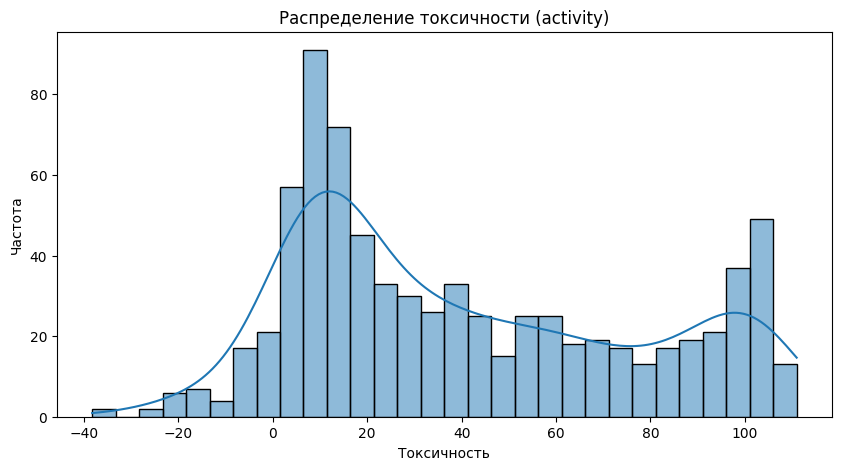

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
train_data = pd.read_csv('C:\\IDE\\Основы машинного обучения\\итог\\train.csv')
test_data = pd.read_csv('C:\\IDE\\Основы машинного обучения\\итог\\test_only_smiles.csv')

# Общая информация о данных
print(train_data.info())
print(train_data.describe())

# Проверяем наличие пропущенных значений
print(train_data.isnull().sum())

# Визуализация распределения целевой переменной 'activity'
plt.figure(figsize=(10, 5))
sns.histplot(train_data['activity'], bins=30, kde=True)
plt.title('Распределение токсичности (activity)')
plt.xlabel('Токсичность')
plt.ylabel('Частота')
plt.show()

# Визуализация взаимосвязи "activity" с "SMILES" (по аналогии, можно использовать для первого анализа)
# Для этого можно создать категориальные графики или использовать первые несколько SMILES.


In [5]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Функция для вычисления дескрипторов
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * 10 # Вернем None если молекула не была сформирована
    return [
        Descriptors.MolWt(mol),              # Молекулярная масса
        Descriptors.NumHDonors(mol),         # Количество доноров водорода
        Descriptors.NumHAcceptors(mol),      # Количество акцепторов водорода
        Descriptors.LogP(mol),                # ЛогП
        Descriptors.TPSA(mol),                # Плоская полярная поверхность
        # Добавьте другие дескрипторы, которые вас интересуют
    ]

# Применяем функцию к каждому SMILES
descriptors = train_data['SMILES'].apply(calculate_descriptors)

# Преобразуем в DataFrame
descriptors_df = pd.DataFrame(descriptors.tolist(), columns=['MolWt', 'NumHDonors', 'NumHAcceptors', 'LogP', 'TPSA'])

# Объединяем с исходными данными
train_data = pd.concat([train_data, descriptors_df], axis=1)
train_data = train_data.drop(columns=['SMILES'])  # Удаляем оригинальный SMILES

# Аналогичные действия выполняем для тестового набора
test_descriptors = test_data['SMILES'].apply(calculate_descriptors)
test_descriptors_df = pd.DataFrame(test_descriptors.tolist(), columns=['MolWt', 'NumHDonors', 'NumHAcceptors', 'LogP', 'TPSA'])
test_data = pd.concat([test_data, test_descriptors_df], axis=1)
test_data = test_data.drop(columns=['SMILES'])


ModuleNotFoundError: No module named 'rdkit'